In [1]:
import numpy as np
import matplotlib.pyplot as plt

<img src="Graficas electronica industrial/circuito1.png">

In [2]:
x = np.linspace(0, 2*np.pi, 500)

def f(x):
    return np.sin(x)

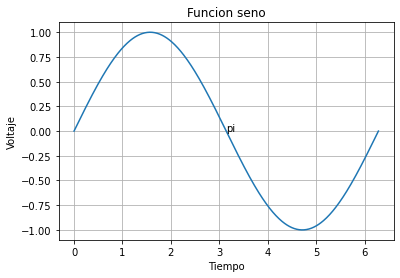

In [3]:
plt.plot(x, f(x))
plt.grid()
plt.xlabel("Tiempo")
plt.ylabel("Voltaje")
plt.title("Funcion seno")
plt.text(np.pi, 0, "pi")
plt.show()

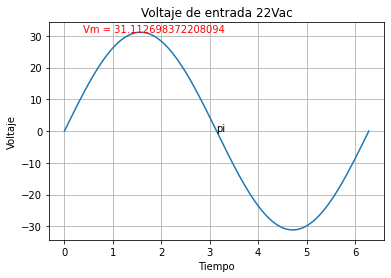

In [18]:
t = np.linspace(0, 2*np.pi, 1000) #Tiempo
vm = 22*np.sqrt(2) #Voltaje maximo = Vrms*√2
vd = 0.7 # Voltaje del diodo
vcc = 15
f = 60
ic = 1.2*10**-3
c = 1*10**-6

#Definicion de funcion para el voltaje de entrada vi(t)
def vi(t):
    return vm*np.sin(t)

plt.plot(t, vi(t))
plt.grid()
plt.xlabel("Tiempo")
plt.ylabel("Voltaje")
plt.title("Voltaje de entrada 22Vac")
plt.text(np.pi, 0, "pi")
plt.text(np.pi/8, vi(np.pi/2), "Vm = " + str(vi(np.pi/2)), color="red")
plt.show()

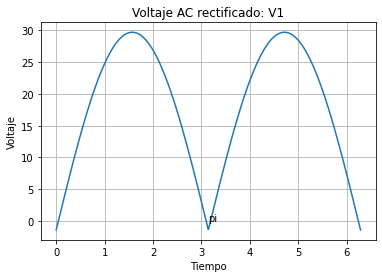

In [5]:
v1 = abs(vi(t)) - 2*vd

plt.plot(t, v1)
plt.grid()
plt.xlabel("Tiempo")
plt.ylabel("Voltaje")
plt.title("Voltaje AC rectificado: V1")
plt.text(np.pi, 0, "pi")
plt.show()

In [6]:
#Definimos una funcion para el detector de cruce por cero DCC

def dcc():
    cc = []
    
    for i in v1:
        if i <= 0.1:
            cc.append(vcc)
        
        else:
            cc.append(0)    
    return np.array(cc)

angulo_cc = np.arcsin(0.1/vm) #Calculamos el angulo de Cruce por Cero en radianes
angulo_cc

0.0032141272666480025

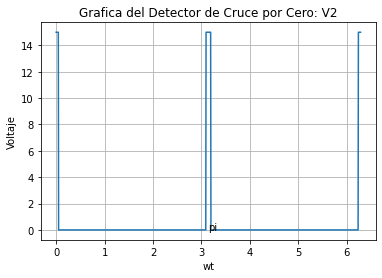

In [7]:
v2 = dcc() #Como vemos en la figura la salida del DCC es V2

plt.plot(t, v2)
plt.grid()
plt.xlabel("wt")
plt.ylabel("Voltaje")
plt.title("Grafica del Detector de Cruce por Cero: V2")
plt.text(np.pi, 0, "pi")
plt.show()

In [9]:
tc = (1/f)/2 #Tiempo de carga del condensador
vcm = ic*tc/c #Voltaje del condensador en un tiempo de pi/2, es decir el maximo que alcanza antes de descargarse
vcm

10.0

In [10]:
#Definimos una funcion para el voltaje del condensador en el tiempo

def vc(t):
    vc = []
    tiempo = []
    tiempo_activo = 0
    
    for i, j in zip(v2, t):
        if i == 0:
            tiempo.append(j*tc/np.pi) #Aqui el tiempo lo pasamos de radianes a segundos
            vc.append(ic*tiempo[tiempo_activo]/c)
            tiempo_activo += 1
        else:
            tiempo.append(j*tc/np.pi)
            vc.append(0.2)
            tiempo_activo = 0
            
    return np.array(vc)

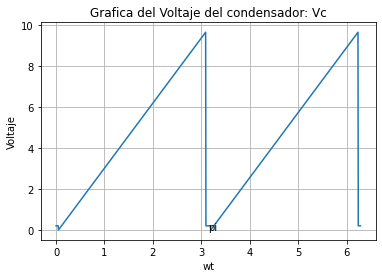

In [11]:
plt.plot(t, vc(t))
plt.grid()
plt.xlabel("wt")
plt.ylabel("Voltaje")
plt.title("Grafica del Voltaje del condensador: Vc")
plt.text(np.pi, 0, "pi")
plt.show()

In [16]:
#Definimos una funcion para la salida de v3

def v3(t):
    v = []
    
    for i in vc(t):
        if i <= 5:
            v.append(0)
        
        else:
            v.append(vcc)    
    return np.array(v)

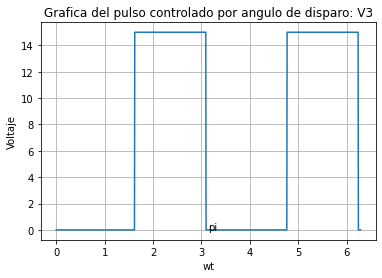

In [17]:
plt.plot(t, v3(t))
plt.grid()
plt.xlabel("wt")
plt.ylabel("Voltaje")
plt.title("Grafica del pulso controlado por angulo de disparo: V3")
plt.text(np.pi, 0, "pi")
plt.show()

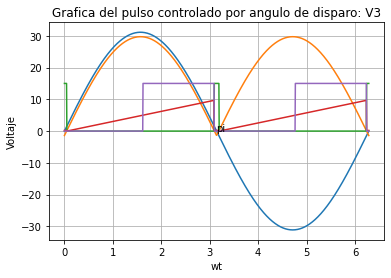

In [19]:
plt.plot(t, vi(t))
plt.plot(t, v1)
plt.plot(t, v2)
plt.plot(t, vc(t))
plt.plot(t, v3(t))
plt.grid()
plt.xlabel("wt")
plt.ylabel("Voltaje")
plt.title("Grafica del pulso controlado por angulo de disparo: V3")
plt.text(np.pi, 0, "pi")
plt.show()

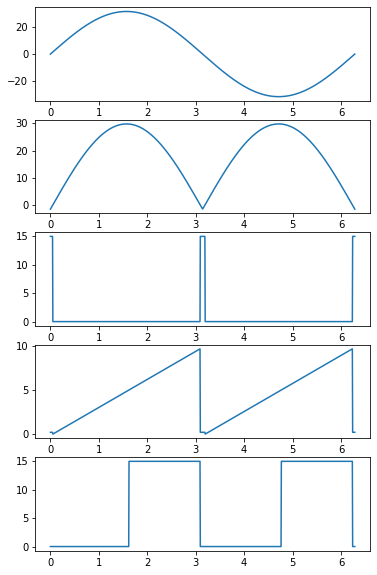

In [23]:
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(5, 1)
ax0.plot(t, vi(t))
ax1.plot(t, v1)
ax2.plot(t, v2)
ax3.plot(t, vc(t))
ax4.plot(t, v3(t))
fig.set_size_inches(6, 10)
plt.show()

## Ejercicio 2

<img src="Graficas electronica industrial/circuito2.png">

### Dibujar El voltaje de Salida Vo(t). Todas las resistencias iguales.
### vi(t) = vm*sen(wt), supuniendo un voltaje pico de 10v
### alpha1 = pi/4
### alpha2 = pi/2

### Los angulos alpha son los de disparo de los SCR respectivamente.

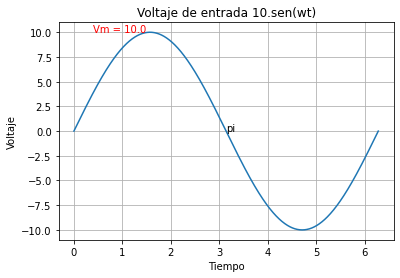

In [24]:
#Empecemos definiendo vi(t)

t = np.linspace(0, 2*np.pi, 1000)
vm = 10 #Voltaje maximo = 10
vd = 0.7 # Voltaje del diodo
f = 60

def vi(t):
    return vm*np.sin(t)

plt.plot(t, vi(t))
plt.grid()
plt.xlabel("Tiempo")
plt.ylabel("Voltaje")
plt.title("Voltaje de entrada 10.sen(wt)")
plt.text(np.pi, 0, "pi")
plt.text(np.pi/8, vi(np.pi/2), "Vm = " + str(vi(np.pi/2)), color="red")
plt.show()

In [34]:
#Definimos los angulos de disparo

alpha_1 = np.pi/4
alpha_2 = np.pi/2

def t1_on(t):
    t1 = []
    
    for i in t:
        """Cambiamos el angulo de disparo no exactamente a pi/4 sino aproximado para poder generar el pulso,
        es decir, ya no es un solo pulso sino un rango entre alpha_1-0.03 < i < alpha_1+0.02"""
        
        if i < (alpha_1-0.03) or i > (alpha_1+0.02): 
            t1.append(0)
        
        else:
            t1.append(5)
    
    return np.array(t1)

def t2_on(t):
    t2 = []
    
    for i in t:
        """Hacemos la misma convercion del tiristor 1"""
        
        if i < (alpha_2-0.03) or i > (alpha_2+0.02): 
            t2.append(0)
        
        else:
            t2.append(5)
    
    return np.array(t2)

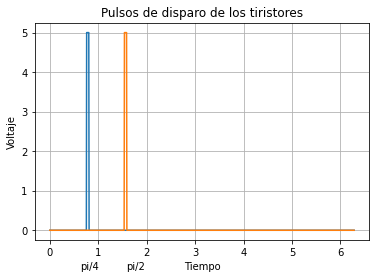

In [35]:
plt.plot(t, t1_on(t))
plt.plot(t, t2_on(t))
plt.grid()
plt.xlabel("Tiempo")
plt.ylabel("Voltaje")
plt.title("Pulsos de disparo de los tiristores")
plt.text(np.pi/5, -1, "pi/4")
plt.text(np.pi/2, -1, "pi/2")
plt.show()

<h2>Para la salida de Vo tenemos 4 casos de estudio:</h2>
<ol>
    <li>Antes de activarse T1, entre 0 y alpha_1</li>
    <li>Luego de activarse T1, antes que se active T2, entre alpha_1 y alpha_2 </li>
    <li>Luego de que esten los 2 SCR activos hasta que se apaguen, entre alpha_2 y pi</li>
    <li>En el semi-ciclo negativo de la fuente</li>
</ol>

In [38]:
#Definimos la funcion de salida v0(t)

def vo(t):
    vo = []
    
    for i in t:
        
        if i < alpha_1:
            #Primer caso de estudio (0 < t < pi/4) D1:ON, T1:OFF, T2:OFF
            #El circuito mequivalente seria la fuente en serie con 4R
            #Vo = vi(t)/4
            vo.append(vi(i)/4)
        
        elif i >= alpha_1 and i < alpha_2:
            #Segundo caso de estudio (pi/4 =< t < pi/2) D1:ON, T1:ON, T2:OFF
            #El circuito mequivalente seria la fuente en serie con 3R
            #Vo = vi(t)/3
            vo.append(vi(i)/3)
        
        elif i >= alpha_2 and i < np.pi:
            #Tercer caso de estudio (pi/2 =< t < pi) D1:ON, T1:ON, T2:ON
            #Cuando el SCR2 se activa conduce la resostencia queda en corto, es decir, que no hay caida de tension en la resistencia
            #Vo = 0
            vo.append(0)
        
        else:
            #Cuarto caso de estudio (pi =< t < 2pi) D1:OFF, T1:OFF, T2:OFF
            #En este momento todas las resistencias estan activas
            #Vo = vi(t)/5
            vo.append(vi(i)/5)
            
    return np.array(vo)

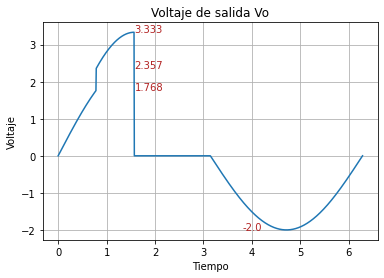

In [39]:
plt.plot(t, vo(t))
plt.title("Voltaje de salida Vo")
plt.xlabel("Tiempo")
plt.ylabel("Voltaje")
plt.grid()
plt.text(np.pi/2 + .01, vi(np.pi/4)/4, round(vi(np.pi/4)/4, 3), color="firebrick")
plt.text(np.pi/2 + .01, vi(np.pi/4)/3, round(vi(np.pi/4)/3, 3), color="firebrick")
plt.text(np.pi/2 + .01, vi(np.pi/2)/3, round(vi(np.pi/2)/3, 3), color="firebrick")
plt.text(3.8, vi(3*np.pi/2)/5, vi(3*np.pi/2)/5, color="firebrick")
plt.show()

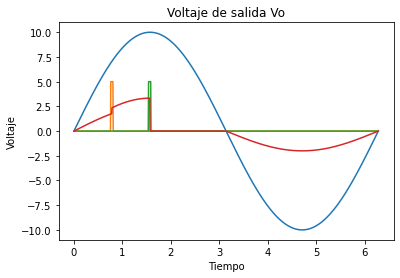

In [40]:
plt.plot(t, vi(t))
plt.plot(t, t1_on(t))
plt.plot(t, t2_on(t))
plt.plot(t, vo(t))
plt.title("Voltaje de salida Vo")
plt.xlabel("Tiempo")
plt.ylabel("Voltaje")
plt.show()

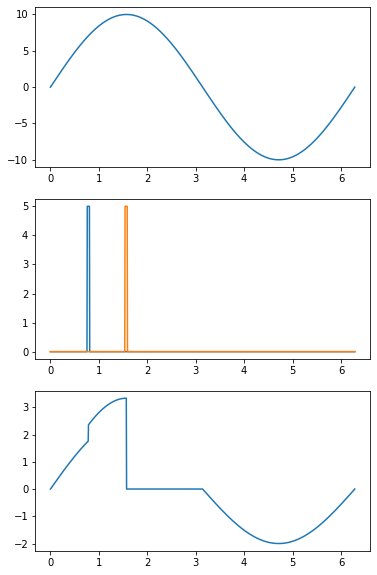

In [42]:
fig, (ax0, ax1, ax2) = plt.subplots(3, 1)
ax0.plot(t, vi(t))
ax1.plot(t, t1_on(t))
ax1.plot(t, t2_on(t))
ax2.plot(t, vo(t))
fig.set_size_inches(6, 10)
plt.show()